#**🧠 AI for Early Alzheimer’s Detection**

In [8]:
"""
Project Title: AI for Early Alzheimer’s Detection

Problem:
Alzheimer’s disease is a progressive neurological disorder.
Early detection enables better clinical intervention and improves quality of life.

Objective:
Build machine learning models to classify Alzheimer’s disease stages
using structured clinical and cognitive assessment data.

Dataset:
OASIS Longitudinal Alzheimer’s Dataset (Tabular Clinical Data)
"""




'\nProject Title: AI for Early Alzheimer’s Detection\n\nProblem:\nAlzheimer’s disease is a progressive neurological disorder.\nEarly detection enables better clinical intervention and improves quality of life.\n\nObjective:\nBuild machine learning models to classify Alzheimer’s disease stages\nusing structured clinical and cognitive assessment data.\n\nDataset:\nOASIS Longitudinal Alzheimer’s Dataset (Tabular Clinical Data)\n'

####1. Install & Import Required Libraries

In [ ]:
# Install libraries (run once in Colab)
!pip install numpy pandas matplotlib seaborn scikit-learn



In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


####2. Load Dataset (Parquet Files)

In [17]:
df = pd.read_csv("oasis_longitudinal.csv")
df.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


####3. Dataset Exploration

In [18]:
df.shape



(373, 15)

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [20]:
df.isnull().sum()

,0
Subject ID,0
MRI ID,0
Group,0
Visit,0
MR Delay,0
M/F,0
Hand,0
Age,0
EDUC,0
SES,19


####4. Data Cleaning & Preprocessing

In [24]:
# Drop ID columns and 'Hand' (not useful for ML or correlation without encoding)
df = df.drop(columns=["Subject ID", "MRI ID", "Hand"], errors="ignore")

# Handle missing values using mean imputation
df = df.fillna(df.mean(numeric_only=True))

# Encode categorical features and target labels
le = LabelEncoder()
df["Group"] = le.fit_transform(df["Group"]) # Target variable
df["M/F"] = le.fit_transform(df["M/F"])   # Gender feature

"""
Encoding:
Group:
Non-Demented → 0
Demented / Converted → higher classes

M/F:
Female (F) → 0
Male (M) → 1 (or vice versa, depends on LabelEncoder's internal mapping)
"""

"\nEncoding:\nGroup:\nNon-Demented → 0\nDemented / Converted → higher classes\n\nM/F:\nFemale (F) → 0\nMale (M) → 1 (or vice versa, depends on LabelEncoder's internal mapping)\n"

####5. Feature–Target Split

In [26]:
X = df.drop("Group", axis=1)
y = df["Group"]

print("Features:", X.shape)
print("Target:", y.shape)


Features: (373, 11)
Target: (373,)


####6. Exploratory Data Analysis (EDA)

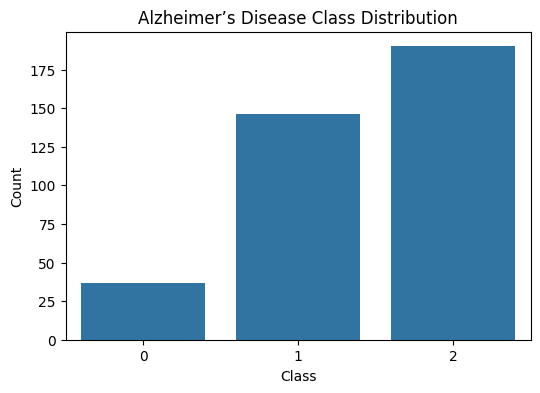

In [27]:
#Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Alzheimer’s Disease Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


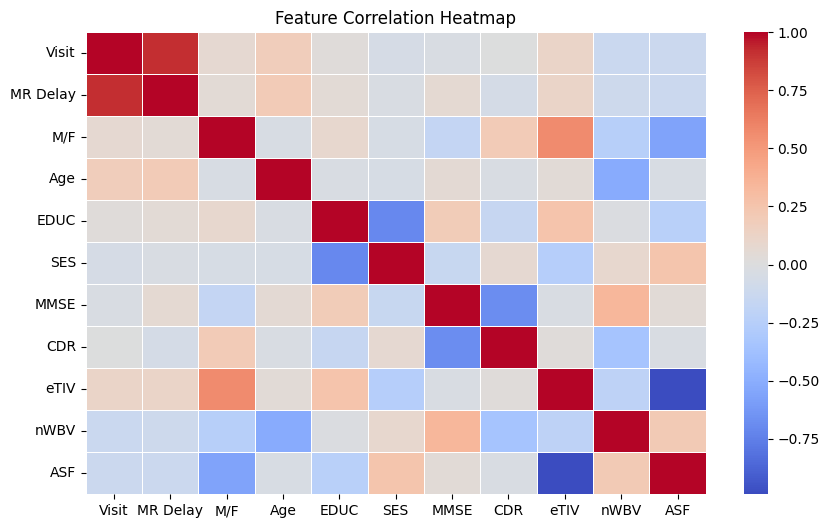

In [28]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


####7. Feature Scaling

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


####8. Train–Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


####9. Model Training

In [32]:
#Logistic Regression (Baseline)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)


In [33]:
#Random Forest (Primary Model)
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


#####Class Imbalance Check

Group
2    190
1    146
0     37
Name: count, dtype: int64


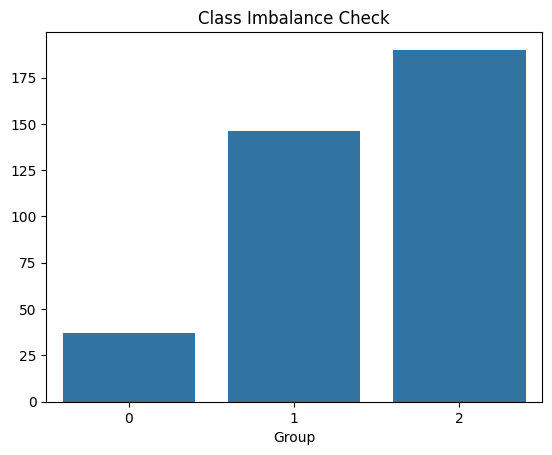

In [41]:
class_counts = y.value_counts()
print(class_counts)

sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Imbalance Check")
plt.show()


In [34]:
#Support Vector Machine
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)


####10. Model Evaluation

In [35]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average="weighted"))
    print("Recall   :", recall_score(y_true, y_pred, average="weighted"))
    print("F1 Score :", f1_score(y_true, y_pred, average="weighted"))
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))


In [36]:
evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("SVM", y_test, svm_preds)



Logistic Regression
Accuracy : 0.9066666666666666
Precision: 0.8921963824289406
Recall   : 0.9066666666666666
F1 Score : 0.8875121586232696

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.97      0.97      0.97        29
           2       0.88      1.00      0.94        38

    accuracy                           0.91        75
   macro avg       0.84      0.74      0.76        75
weighted avg       0.89      0.91      0.89        75


Random Forest
Accuracy : 0.9066666666666666
Precision: 0.8921963824289406
Recall   : 0.9066666666666666
F1 Score : 0.8875121586232696

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.97      0.97      0.97        29
           2       0.88      1.00      0.94        38

    accuracy                           0.91        75
   macro avg       0.

In [42]:
#Model comparison table
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, lr_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, svm_preds)
    ],
    "F1 Score": [
        f1_score(y_test, lr_preds, average="weighted"),
        f1_score(y_test, rf_preds, average="weighted"),
        f1_score(y_test, svm_preds, average="weighted")
    ],
    "Recall": [
        recall_score(y_test, lr_preds, average="weighted"),
        recall_score(y_test, rf_preds, average="weighted"),
        recall_score(y_test, svm_preds, average="weighted")
    ]
})

results

,Model,Accuracy,F1 Score,Recall
0,Logistic Regression,0.906667,0.887512,0.906667
1,Random Forest,0.906667,0.887512,0.906667
2,SVM,0.906667,0.872872,0.906667


####11. Confusion Matrix (Best Model – Random Forest)

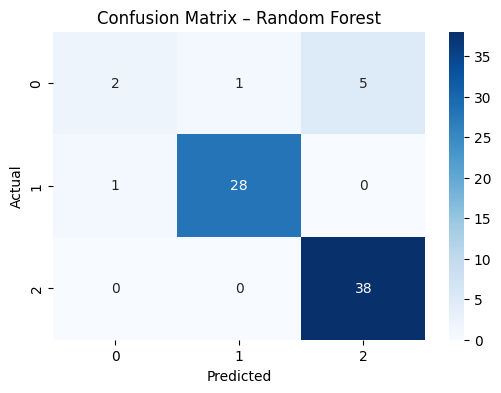

In [37]:
cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


####12. Feature Importance (Explainability)

In [38]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)


,Feature,Importance
7,CDR,0.279107
6,MMSE,0.132080
3,Age,0.091596
1,MR Delay,0.086193
9,nWBV,0.083812
10,ASF,0.081310
8,eTIV,0.080998
5,SES,0.070690
4,EDUC,0.047747
0,Visit,0.030849


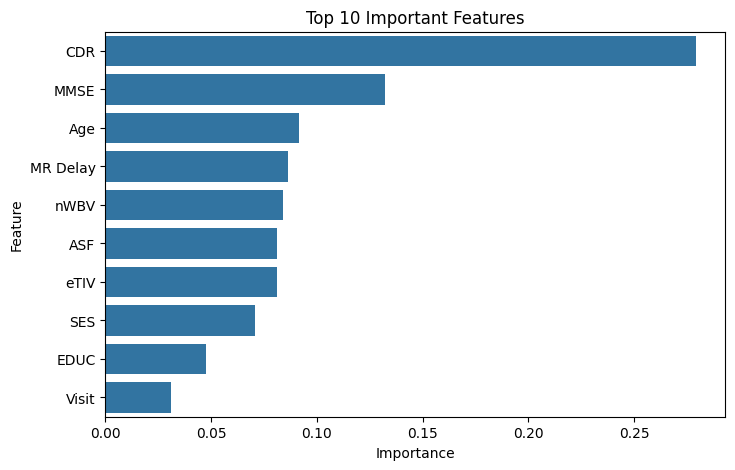

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance.head(10)
)
plt.title("Top 10 Important Features")
plt.show()


####13. Key Results & Insights

In [ ]:
"""
• Random Forest achieved the best performance among tested models
• Cognitive assessment features were the strongest predictors
• Feature importance improves model interpretability
• Model demonstrates potential for early Alzheimer’s detection
"""


In [ ]:
"""
This model is intended for decision support only.
It should not replace professional medical diagnosis.
Patient privacy and data security must be ensured.
"""


####14. Conclusion

In [ ]:
"""
Conclusion:
This project demonstrates the application of machine learning
for early Alzheimer’s disease detection using clinical data.

Future Work:
• Use longitudinal patient history
• Combine imaging and clinical features
• Deploy as a clinical decision support tool
"""
